https://statisticsbyjim.com/time-series/autocorrelation-partial-autocorrelation/

# Stationarity 
There are several ways to identify non-stationary time-series data:
1. Look at Plots: You can review a time series plot of your data and visually check if there are any obvious 
trends or seasonality. This should always be your first step in time-series analysis. It often shows whether 
there is underlying structure. Be on the lookout for trend, seasonality, and autocorrelation. The previous plots 
are great examples
2. Summary Statistics: You can review the summary statistics for your data for seasons or random partitions 
and check for obvious or significant differences. 
3. Histogram Plot
4. Statistical Tests: You can use statistical tests to check if the expectations of stationarity are met or have 
been violated

In time series analysis, stationarity refers to the property of a time series where the statistical properties of the series remain constant over time. More specifically, a stationary time series has the following properties:

Constant mean: The mean of the series remains constant over time.

Constant variance: The variance of the series remains constant over time.

Constant autocorrelation: The autocorrelation between the values of the series at different time lags remains constant over time.

Stationarity is an important assumption in many time series models, as it simplifies the modeling process and allows for the use of certain statistical tools such as autocorrelation and cross-correlation analysis. If a time series is non-stationary, it may exhibit trends, seasonal patterns, or other forms of systematic variation that can make it difficult to model and forecast accurately.

To check for stationarity, one can perform visual inspection of the time series plot, as well as statistical tests such as the Augmented Dickey-Fuller (ADF) test or the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test. If a time series is found to be non-stationary, it can be transformed or differenced in various ways to make it stationary, such as taking the first difference or applying a logarithmic transformation.

### How Does the Augmented Dickey-Fuller (ADF) Test Work?
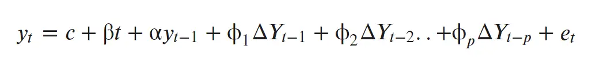
* Δyt is the first difference of the time series yt
* α is a constant term
* β is the coefficient of a linear trend
* γ is the coefficient of the lagged value of yt-1
* δ1...δp are coefficients of the lagged differences of the time series
* εt is the error term
If you notice, we have only added more differencing terms while the rest of the equation remains the same. This adds more thoroughness to the test. The null hypothesis, however, is still the same as the Dickey-Fuller test.

A key point to remember here is: Since the null hypothesis assumes the presence of unit root, that is α=1, the p-value obtained should be less than the significance level (say 0.05) in order to reject the null hypothesis. Thereby inferring that the series is stationary.

However, this is a very common mistake analysts commit with this test. That is, if the p-value is less than the significance level, people mistakenly take the series to be non-stationary.

https://www.analyticsvidhya.com/blog/2021/06/statistical-tests-to-check-stationarity-in-time-series-part-1/

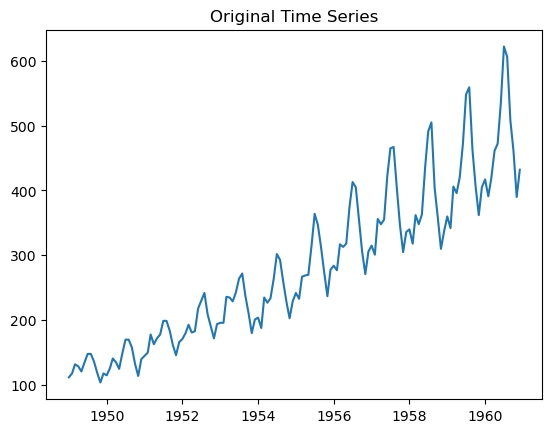

ADF Test Statistic: 0.8153688792060512
p-value: 0.991880243437641
The time series is non-stationary.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the time series data
data = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=True)

# Visualize the time series
plt.plot(data)
plt.title('Original Time Series')
plt.show()

# Perform the ADF test for stationarity
result = sm.tsa.stattools.adfuller(data['#Passengers'])

# Print the test statistic and p-value
print('ADF Test Statistic:', result[0])
print('p-value:', result[1])

# Check if the p-value is less than the significance level (e.g., 0.05) to reject the null hypothesis of non-stationarity
if result[1] < 0.05:
    print('The time series is stationary.')
else:
    print('The time series is non-stationary.')


* less appropriate test to use with small datasets or when heteroscedasticity is present
* It is best to pair ADF with other techniques, such as plotting the series, summary statistics, or histograms

• The Dickey-Fuller test basically assumes that our time series in question is an AR(1) model (lag 1 period) with intercept,
where 𝑦𝑡 = 𝑐 + 𝜙 𝑦𝑡−1 + 𝜖𝑡

.
• The null and alternative hypothesis of test is:

• 𝐻0:𝜙 = 1 𝑢𝑛𝑖𝑡 𝑟𝑜𝑜𝑡

• 𝐻𝑎:𝜙 < 1 𝑁𝑜 𝑢𝑛𝑖𝑡 𝑟𝑜𝑜𝑡 (𝑆𝑡𝑎𝑡𝑖𝑜𝑛𝑎𝑟𝑦 𝑐𝑜𝑛𝑑𝑖𝑡𝑖𝑜𝑛 𝑜𝑛 𝜙)

• The first thing to do is subtract 𝑦𝑡−1 from both sides → 𝑦𝑡 − 𝑦𝑡−1 = 𝑐 + 𝜙 − 1 𝑦𝑡−1 + 𝜖𝑡
.
• Then by writing new variables where Δ𝑦𝑡 = 𝑦𝑡 − 𝑦𝑡−1 & 𝛿 = 𝜙 − 1 → Δ𝑦𝑡 = 𝑐 + 𝛿𝑦𝑡−1 + 𝜖𝑡
.
• Re-writing null and alternative hypothesis of test:

• 𝐻0: 𝛿 = 0

• 𝐻𝑎: 𝛿 < 0

• Why did we do this step? Because we wanted to make the left-hand side stationary, and our null hypothesis becomes that series is stationary since if 𝛿 =
0 then Δ𝑦𝑡 = 𝐶 + 𝜖𝑡 where 𝜖𝑡

is assumed to be normally distributed with constant mean and variance.

• Why can't we just do a simple t-test for the value of delta? Because the value of 𝑦𝑡−1 is still non-stationary which means it has no constant mean or variance as the normal or t-distribution has. If it as stationary, we can normally use the same t-test we usually use.

• Why is still 𝑦𝑡−1 non-stationary? Because the value of 𝑦𝑡
is assumed at the beginning to be non-stationary

# summary statistics 
for different partitions or subsets of the data is a useful technique for detecting non-stationarity in time series data.

If the mean, variance, or other summary statistics vary significantly between different seasons or random partitions of the data, it may indicate the presence of a trend or other non-stationary behavior. On the other hand, if the summary statistics remain relatively constant across different partitions, it may indicate stationarity.

It's important to note, however, that this approach is not always conclusive and may not detect all types of non-stationarity. It should be used in conjunction with other techniques such as visual inspection of the time series plot and statistical tests such as the Augmented Dickey-Fuller (ADF) test.

In [24]:
# Compute summary statistics for each year
yearly_summary = data.groupby(data.index.year)['#Passengers'].describe()

# Compute summary statistics for each quarter
quarterly_summary = data.groupby(data.index.quarter)['#Passengers'].describe()

# Print the results
print("Yearly summary statistics:\n", yearly_summary)
print("\nQuarterly summary statistics:\n", quarterly_summary)


Yearly summary statistics:
        count        mean        std    min     25%    50%     75%    max
Month                                                                   
1949    12.0  126.666667  13.720147  104.0  118.00  125.0  135.25  148.0
1950    12.0  139.666667  19.070841  114.0  125.75  137.5  151.25  170.0
1951    12.0  170.166667  18.438267  145.0  159.00  169.0  179.50  199.0
1952    12.0  197.000000  22.966379  171.0  180.75  192.0  211.25  242.0
1953    12.0  225.000000  28.466887  180.0  199.75  232.0  238.50  272.0
1954    12.0  238.916667  34.924486  188.0  221.25  231.5  260.25  302.0
1955    12.0  284.000000  42.140458  233.0  260.75  272.0  312.75  364.0
1956    12.0  328.250000  47.861780  271.0  300.50  315.0  359.75  413.0
1957    12.0  368.416667  57.890898  301.0  330.75  351.5  408.50  467.0
1958    12.0  381.000000  64.530472  310.0  339.25  360.5  411.75  505.0
1959    12.0  428.333333  69.830097  342.0  387.50  406.5  465.25  559.0
1960    12.0  476.16666

A histogram plot can be used to visualize the distribution of the data and identify any significant differences or patterns. 

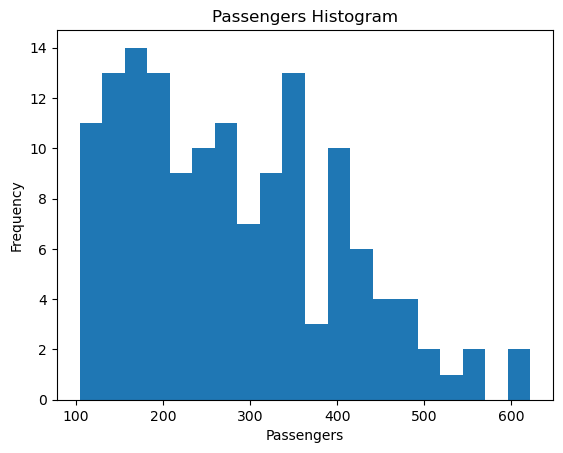

In [25]:
import matplotlib.pyplot as plt

# Plot histogram of data
plt.hist(data['#Passengers'], bins=20)
plt.title('Passengers Histogram')
plt.xlabel('Passengers')
plt.ylabel('Frequency')
plt.show()
